In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

#fname = "root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/127C2975-1B1C-A046-AABF-62B77E757A86.root"
fname = "file:/opendata_cms/DoubleMuon/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD/127C2975-1B1C-A046-AABF-62B77E757A86.root"
#fname = "file:///code/data/EEB2FE3F-7CF3-BF4A-9F70-3F89FACE698E.root"
events = NanoEventsFactory.from_root(
    {fname: "Events"},
    schemaclass=NanoAODSchema,
    metadata={"dataset": "DoubleMuon"},
).events()

print("Number of events = ", ak.num(events.Muon, axis=0).compute())

/usr/local/venv/lib/python3.10/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/usr/local/venv/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/venv/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cr

Number of events =  2147195


In [2]:
print("Number of muons = ", ak.count(events.Muon.mass, axis=None).compute())

Number of muons =  4806013


In [3]:
selected_muons = events.Muon[(events.Muon.isGlobal == 1)]
print("Number of selected muons after isGlobal==1: ", ak.count(selected_muons.mass, axis=None).compute())

Number of selected muons after isGlobal==1:  4110800


In [4]:
selected_muons = selected_muons[(selected_muons.nStations > 0)]
print("Number of selected muons after nStations>0: ", ak.count(selected_muons.mass, axis=None).compute())

Number of selected muons after nStations>0:  3936437


In [5]:
selected_muons = selected_muons[(selected_muons.nTrackerLayers > 5)]
print("Number of selected muons after nTrackerLayers>5: ", ak.count(selected_muons.mass, axis=None).compute())

Number of selected muons after nTrackerLayers>5:  3908889


In [6]:
selected_muons = selected_muons[(selected_muons.dxy < 0.3) & (selected_muons.dz < 20.0)]
print("Number of selected muons after PV impact param sel: ", ak.count(selected_muons.mass, axis=None).compute())       

Number of selected muons after PV impact param sel:  3892547


In [7]:
selected_muons = selected_muons[(selected_muons.pt > 3.0) & (abs(selected_muons.eta) < 2.4)]
print("Number of selected muons after pt,eta sel: ", ak.count(selected_muons.mass, axis=None).compute())

Number of selected muons after pt,eta sel:  3883500


In [8]:
selected_muons = selected_muons[(selected_muons.pfRelIso03_chg < 0.5)]
print("Number of selected muons after ptcone30 isolation: ", ak.count(selected_muons.mass, axis=None).compute())

Number of selected muons after ptcone30 isolation:  2681124


In [9]:
selectede_muons = selected_muons[ak.num(selected_muons) > 0]
print("Number of selected events with num(muons)>0: ", ak.num(selectede_muons.mass, axis=0).compute())
print("Corresponding number of selected muons: ", ak.count(selectede_muons.mass, axis=None).compute())

Number of selected events with num(muons)>0:  1604214
Corresponding number of selected muons:  2681124


In [10]:
#selected_muons_c = selected_muons.compute()
pass

In [11]:
fourmuon = ak.combinations(selected_muons, 4, fields=['lep1','lep2','lep3','lep4'])

In [12]:
print(type(fourmuon))

<class 'dask_awkward.lib.core.Array'>


In [13]:
print("Number of 4-muon combination: ", ak.count(fourmuon.lep1.mass, axis=None).compute())

Number of 4-muon combination:  6170


In [14]:
fourmuon_c = fourmuon.compute()

In [15]:
print("Number of 4-muon (computed) combination: ", ak.count(fourmuon_c.lep1.mass, axis=None))

Number of 4-muon (computed) combination:  6170


In [16]:
# should be the same as above
print("Number of 4-muon (computed) combination: ", ak.count(fourmuon_c.lep4.pt, axis=None))

Number of 4-muon (computed) combination:  6170


In [17]:
print(fourmuon_c.lep1.charge[ak.num(fourmuon_c)>1] + fourmuon_c.lep2.charge[ak.num(fourmuon_c)>1])

[[0, 0, 0, 0, -2], [-2, -2, -2, -2, -2], ..., [0, 0, ..., 0], [0, 0, 0, 0, -2]]


In [18]:
#fourmuon_c = fourmuon_c[((fourmuon_c.lep1.charge + fourmuon_c.lep2.charge == 0) and
#                         (fourmuon_c.lep3.charge + fourmuon_c.lep4.charge == 0))]
#fourmuon_c = fourmuon_c[(fourmuon_c.lep1.charge + fourmuon_c.lep2.charge == 0)]
fourmuon_c = fourmuon_c[(fourmuon_c.lep1.charge + fourmuon_c.lep2.charge == 0) &
                        (fourmuon_c.lep3.charge + fourmuon_c.lep4.charge == 0)]

In [19]:
xxx = fourmuon_c.lep1.charge + fourmuon_c.lep2.charge == 0

In [20]:
i = 0
for j, qquad in enumerate(fourmuon_c):
    if len(qquad) == 0:
        continue
    print(j, ':', '[', end=' ')
    for quad in qquad:
        print(quad.lep1.charge+quad.lep2.charge==0, quad.lep3.charge+quad.lep4.charge==0, end=' ')
    print(']')
    i = i+1
    if i>100:
        break

1570 : [ True True ]
2436 : [ True True ]
2938 : [ True True ]
3467 : [ True True ]
4601 : [ True True ]
7634 : [ True True True True True True ]
8682 : [ True True ]
13819 : [ True True True True ]
14605 : [ True True ]
19403 : [ True True ]
22850 : [ True True ]
25327 : [ True True ]
27318 : [ True True ]
31044 : [ True True ]
31450 : [ True True ]
32974 : [ True True ]
34121 : [ True True ]
34153 : [ True True ]
34888 : [ True True ]
38340 : [ True True ]
50116 : [ True True ]
50385 : [ True True ]
50945 : [ True True ]
52093 : [ True True ]
53013 : [ True True ]
55074 : [ True True ]
55500 : [ True True True True True True ]
55809 : [ True True ]
56043 : [ True True ]
56242 : [ True True ]
56558 : [ True True ]
56691 : [ True True ]
56920 : [ True True ]
57181 : [ True True ]
57259 : [ True True ]
60537 : [ True True ]
61028 : [ True True ]
61077 : [ True True ]
62084 : [ True True ]
62366 : [ True True ]
62452 : [ True True ]
63684 : [ True True ]
63915 : [ True True ]
65921 : [ T

In [21]:
#countset = set()
#for j, qquad in enumerate(fourmuon_c):
#    countset.add(len(qquad))
#print(countset)

In [22]:
#counthist = {}
#for qquad in fourmuon_c:
#    j = len(qquad)
#    if j in counthist:
#        counthist[j] += 1
#    else:
#        counthist[j] = 1
#print(counthist)

In [23]:
#i = 0
#for j, qquad in enumerate(fourmuon_c):
#    if len(qquad) == 0:
#        continue
#    print(j, ':', '[', end=' ')
#    for quad in qquad:
#        print(type(quad), end=' ')
#        print(type(quad.lep1), end=' ')
#        print(type(quad.lep1.pt), end=' ')
#        print(quad.lep1.pt, quad.lep2.pt, quad.lep3.pt, quad.lep4.pt, end=' ')
#    print(']')
#    i = i+1
#    if i>100:
#        break

In [24]:
print(fourmuon_c[1919].lep1.pt)

[]


In [25]:
print(type(fourmuon_c[1919].lep1.pt))

<class 'awkward.highlevel.Array'>


In [26]:
i = 0
for j, qquad in enumerate(fourmuon_c):
    if len(qquad) == 0:
        continue
    print(j, ':', qquad.lep1.pt, qquad.lep2.pt, qquad.lep3.pt, qquad.lep4.pt)
    i += 1
    if i>100:
        break

1570 : [4.44] [4.41] [4.11] [3.79]
2436 : [15.4] [13.3] [7.14] [3.46]
2938 : [7.43] [5.83] [3.74] [3.41]
3467 : [4.01] [3.75] [3.33] [3.11]
4601 : [22.8] [13] [5.89] [3.47]
7634 : [15.7, 15.7, 15.7] [14.1, 14.1, 9.49] [9.49, 8.86, 8.86] [8.86, 5.8, 5.8]
8682 : [20.1] [9.27] [6.66] [6.03]
13819 : [21.4, 21.4] [8.09, 8.09] [6.74, 6.74] [3.8, 3.04]
14605 : [4.43] [4.22] [4.19] [4.19]
19403 : [26.3] [11.9] [9.06] [3.88]
22850 : [5.22] [4.71] [3.21] [3.01]
25327 : [9] [6.25] [5.42] [3.36]
27318 : [18.4] [9.03] [4.53] [3.71]
31044 : [20.3] [6.2] [3.32] [3.27]
31450 : [11.8] [6.63] [5.16] [3.87]
32974 : [58.2] [24.3] [12] [4.13]
34121 : [17.2] [14.4] [13.1] [5.54]
34153 : [8.34] [7.76] [6.35] [3.73]
34888 : [11.6] [8.45] [5.13] [3.73]
38340 : [9.3] [4.92] [4.07] [3.09]
50116 : [11.5] [6.55] [6.55] [5.67]
50385 : [20.3] [18] [8.33] [3.55]
50945 : [8.38] [4.3] [4.28] [3.36]
52093 : [13] [11.3] [7.01] [3.69]
53013 : [5.77] [4.62] [4.35] [3.54]
55074 : [7.16] [6.6] [5.06] [4.92]
55500 : [13.1, 13

In [27]:
fourmuon_c["pair1"] = fourmuon_c.lep1 + fourmuon_c.lep2
fourmuon_c["pair2"] = fourmuon_c.lep3 + fourmuon_c.lep4

In [28]:
i = 0
for j, qquad in enumerate(fourmuon_c):
    if len(qquad) == 0:
        continue
    print(j, ':', qquad.pair1.mass, qquad.pair2.mass)
    i += 1
    if i>200:
        break

1570 : [3.86] [7.6]
2436 : [3.11] [2.12]
2938 : [2.39] [7.77]
3467 : [16.4] [23.4]
4601 : [2.98] [15.5]
7634 : [3.06, 3.06, 19.7] [2.7, 14.4, 14.4]
8682 : [28] [1.95]
13819 : [26.4, 26.4] [4.76, 3.48]
14605 : [9.23] [7.3]
19403 : [48] [2.16]
22850 : [5.31] [4.71]
25327 : [16.4] [16.3]
27318 : [2.2] [2.12]
31044 : [18.9] [6.48]
31450 : [2.81] [38]
32974 : [90.9] [1.45]
34121 : [30.6] [15]
34153 : [4.69] [13.5]
34888 : [3.73] [10.6]
38340 : [14.6] [15.7]
50116 : [17.3] [12.2]
50385 : [41.4] [7.72]
50945 : [7.4] [6.74]
52093 : [3.06] [22.8]
53013 : [7.18] [8.44]
55074 : [14.1] [9.64]
55500 : [42.3, 42.3, 12] [9.2, 1.62, 1.62]
55809 : [8.8] [28.2]
56043 : [3.11] [15.8]
56242 : [24.3] [9.51]
56558 : [50.6] [1.09]
56691 : [2.69] [17.6]
56920 : [76.6] [28.6]
57181 : [3.8] [13]
57259 : [90.1] [14.8]
60537 : [13.8] [14.6]
61028 : [23.1] [0.947]
61077 : [24.1] [4.17]
62084 : [44.6] [21.4]
62366 : [6.02] [8.43]
62452 : [38.6] [28]
63684 : [65.8] [7.65]
63915 : [33.4] [73.6]
65921 : [47.4] [7.12]


In [29]:
i = 0
for j, qquad in enumerate(fourmuon_c):
    if len(qquad) == 0:
        continue
    print(j, ':', qquad.pair1.mass[0], qquad.pair2.mass[0])
    i += 1
    if i>30:
        break

1570 : 3.8560288 7.5953736
2436 : 3.1098068 2.1201692
2938 : 2.393349 7.7710075
3467 : 16.43877 23.356333
4601 : 2.9752808 15.549328
7634 : 3.055996 2.6950748
8682 : 27.983902 1.9456105
13819 : 26.369946 4.758242
14605 : 9.2253685 7.296944
19403 : 48.02938 2.1630223
22850 : 5.3092074 4.713311
25327 : 16.447248 16.28498
27318 : 2.2045512 2.1221833
31044 : 18.920177 6.475196
31450 : 2.8126898 38.02492
32974 : 90.88312 1.446199
34121 : 30.638048 15.000087
34153 : 4.691203 13.477272
34888 : 3.7286992 10.564054
38340 : 14.622793 15.748372
50116 : 17.305595 12.185983
50385 : 41.398808 7.7201886
50945 : 7.401854 6.738733
52093 : 3.0567248 22.83253
53013 : 7.177885 8.435709
55074 : 14.056404 9.636097
55500 : 42.303074 9.196771
55809 : 8.796528 28.154205
56043 : 3.1144547 15.787054
56242 : 24.345057 9.511949
56558 : 50.6359 1.0926893


In [30]:
i = 0
fourmuon_t1 = abs(fourmuon_c.pair1.mass - 3.096916)
for j, qquad in enumerate(fourmuon_t1):
    if len(qquad) == 0:
        continue
    print(j, ':', qquad, qquad)
    i += 1
    if i>30:
        break

1570 : [0.759] [0.759]
2436 : [0.0129] [0.0129]
2938 : [0.704] [0.704]
3467 : [13.3] [13.3]
4601 : [0.122] [0.122]
7634 : [0.0409, 0.0409, 16.6] [0.0409, 0.0409, 16.6]
8682 : [24.9] [24.9]
13819 : [23.3, 23.3] [23.3, 23.3]
14605 : [6.13] [6.13]
19403 : [44.9] [44.9]
22850 : [2.21] [2.21]
25327 : [13.4] [13.4]
27318 : [0.892] [0.892]
31044 : [15.8] [15.8]
31450 : [0.284] [0.284]
32974 : [87.8] [87.8]
34121 : [27.5] [27.5]
34153 : [1.59] [1.59]
34888 : [0.632] [0.632]
38340 : [11.5] [11.5]
50116 : [14.2] [14.2]
50385 : [38.3] [38.3]
50945 : [4.3] [4.3]
52093 : [0.0402] [0.0402]
53013 : [4.08] [4.08]
55074 : [11] [11]
55500 : [39.2, 39.2, 8.88] [39.2, 39.2, 8.88]
55809 : [5.7] [5.7]
56043 : [0.0175] [0.0175]
56242 : [21.2] [21.2]
56558 : [47.5] [47.5]


In [31]:
i = 0
fourmuon_t1 = abs(fourmuon_c.pair1.mass - 9.46030)
for j, qquad in enumerate(fourmuon_t1):
    if len(qquad) == 0:
        continue
    print(j, ':', qquad, qquad)
    i += 1
    if i>30:
        break

1570 : [5.6] [5.6]
2436 : [6.35] [6.35]
2938 : [7.07] [7.07]
3467 : [6.98] [6.98]
4601 : [6.49] [6.49]
7634 : [6.4, 6.4, 10.3] [6.4, 6.4, 10.3]
8682 : [18.5] [18.5]
13819 : [16.9, 16.9] [16.9, 16.9]
14605 : [0.235] [0.235]
19403 : [38.6] [38.6]
22850 : [4.15] [4.15]
25327 : [6.99] [6.99]
27318 : [7.26] [7.26]
31044 : [9.46] [9.46]
31450 : [6.65] [6.65]
32974 : [81.4] [81.4]
34121 : [21.2] [21.2]
34153 : [4.77] [4.77]
34888 : [5.73] [5.73]
38340 : [5.16] [5.16]
50116 : [7.85] [7.85]
50385 : [31.9] [31.9]
50945 : [2.06] [2.06]
52093 : [6.4] [6.4]
53013 : [2.28] [2.28]
55074 : [4.6] [4.6]
55500 : [32.8, 32.8, 2.51] [32.8, 32.8, 2.51]
55809 : [0.664] [0.664]
56043 : [6.35] [6.35]
56242 : [14.9] [14.9]
56558 : [41.2] [41.2]


In [32]:
i = 0
fourmuon_t1 = ak.min(ak.Array([abs(fourmuon_c.pair1.mass - 3.096916), abs(fourmuon_c.pair1.mass - 9.46030)]), axis=0)
for j, qquad in enumerate(fourmuon_t1):
    if len(qquad) == 0:
        continue
    print(j, ':', qquad, qquad)
    i += 1
    if i>30:
        break

1570 : [0.759] [0.759]
2436 : [0.0129] [0.0129]
2938 : [0.704] [0.704]
3467 : [6.98] [6.98]
4601 : [0.122] [0.122]
7634 : [0.0409, 0.0409, 10.3] [0.0409, 0.0409, 10.3]
8682 : [18.5] [18.5]
13819 : [16.9, 16.9] [16.9, 16.9]
14605 : [0.235] [0.235]
19403 : [38.6] [38.6]
22850 : [2.21] [2.21]
25327 : [6.99] [6.99]
27318 : [0.892] [0.892]
31044 : [9.46] [9.46]
31450 : [0.284] [0.284]
32974 : [81.4] [81.4]
34121 : [21.2] [21.2]
34153 : [1.59] [1.59]
34888 : [0.632] [0.632]
38340 : [5.16] [5.16]
50116 : [7.85] [7.85]
50385 : [31.9] [31.9]
50945 : [2.06] [2.06]
52093 : [0.0402] [0.0402]
53013 : [2.28] [2.28]
55074 : [4.6] [4.6]
55500 : [32.8, 32.8, 2.51] [32.8, 32.8, 2.51]
55809 : [0.664] [0.664]
56043 : [0.0175] [0.0175]
56242 : [14.9] [14.9]
56558 : [41.2] [41.2]


In [33]:
jpsimass = 3.096916
upsilonmass = 9.46030
bestmass = ak.singletons(
               ak.argmin(
                   ak.min(
                       ak.Array([abs(fourmuon_c.pair1.mass - jpsimass), abs(fourmuon_c.pair1.mass - upsilonmass)]), axis=0
                   ) +
                   ak.min(
                       ak.Array([abs(fourmuon_c.pair2.mass - jpsimass), abs(fourmuon_c.pair2.mass - upsilonmass)]), axis=0
                   ),
                   axis=1
               )
)

In [38]:
i = 0
for j, ididx in enumerate(bestmass):
    if ak.count(ididx)==0:
        continue
    print(j, ididx)
    i += 1
    if i>50:
        break

1570 [0]
2436 [0]
2938 [0]
3467 [0]
4601 [0]
7634 [0]
8682 [0]
13819 [1]
14605 [0]
19403 [0]
22850 [0]
25327 [0]
27318 [0]
31044 [0]
31450 [0]
32974 [0]
34121 [0]
34153 [0]
34888 [0]
38340 [0]
50116 [0]
50385 [0]
50945 [0]
52093 [0]
53013 [0]
55074 [0]
55500 [2]
55809 [0]
56043 [0]
56242 [0]
56558 [0]
56691 [0]
56920 [0]
57181 [0]
57259 [0]
60537 [0]
61028 [0]
61077 [0]
62084 [0]
62366 [0]
62452 [0]
63684 [0]
63915 [0]
65921 [0]
67408 [0]
67456 [0]
67751 [0]
67976 [0]
68506 [0]
69595 [0]
72516 [0]


In [39]:
fourmuon_bm = ak.flatten(fourmuon_c[bestmass])

In [42]:
fourmuon_bm.pair2.mass

<Array [7.6, 2.12, 7.77, 23.4, ..., 12.4, 26.9, 23, 11.4] type='2135 * float32'>

In [44]:
allmass = ak.concatenate(ak.Array([fourmuon_bm.pair1.mass, fourmuon_bm.pair2.mass]))

In [45]:
allmass

<Array [3.86, 3.11, 2.39, 16.4, ..., 26.9, 23, 11.4] type='4270 * float64'>

In [49]:
import hist
import matplotlib.pyplot as plt   #TODO move these up
%matplotlib inline
#histogram = hist.Hist.new.Reg(1000, 0, 200,
#                              name="m2mu", label="m2mu [GeV]").Weight()
histogram = hist.Hist.new.Reg(100, 0, 10, name="m2mu", label="m2mu [GeV]").Weight()

In [50]:
histogram.fill(m2mu=allmass)

Hist(Regular(100, 0, 10, name='m2mu', label='m2mu [GeV]'), storage=Weight()) # Sum: WeightedSum(value=2029, variance=2029) (WeightedSum(value=4270, variance=4270) with flow)

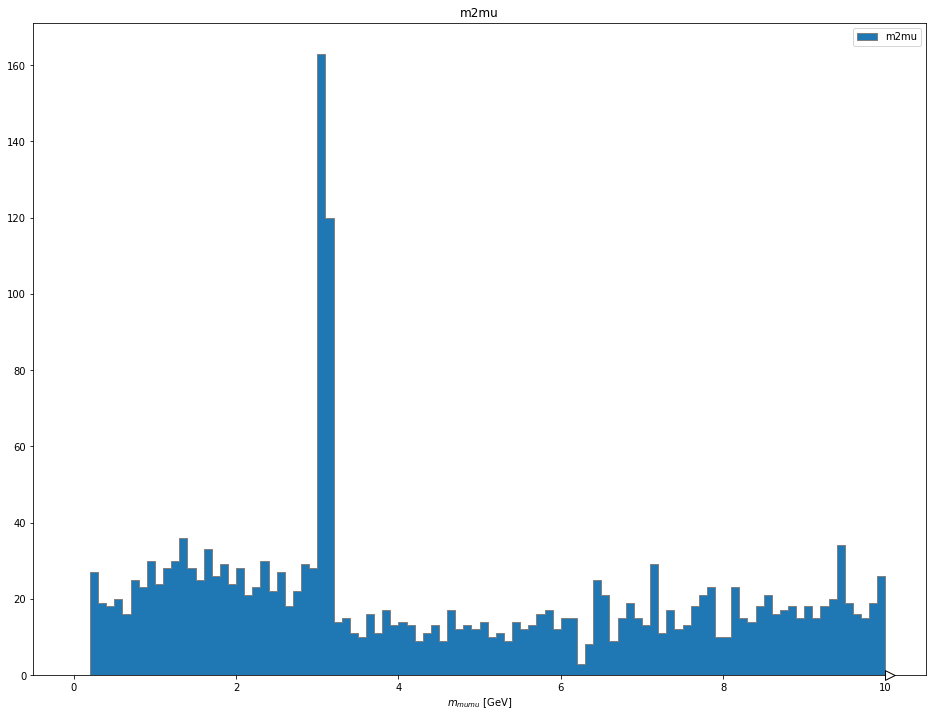

In [51]:
plt.figure(figsize=(16,12))
histogram.plot(histtype="fill", linewidth=1, edgecolor="grey", label='m2mu')
plt.legend()
plt.title("m2mu")
plt.xlabel("$m_{mumu}$ [GeV]");
plt.show()